# 8. Random Forest

In [179]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve

In [180]:
# Read the CSV file 'wine.csv' into a pandas DataFrame 'df'
df = pd.read_csv('wine.csv')
df

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [181]:
# Shows a tuple with row and column size
df.shape

(1143, 13)

In [182]:
# Returns the first few rows of the DataFrame df
df.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [183]:
# Generate descriptive statistics of the DataFrame 'df'
df.describe()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,804.969379,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,463.997116,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,0.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,411.000000,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,794.000000,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,1209.500000,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,1597.000000,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [184]:
# Display concise information about the DataFrame 'df'
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1143 non-null   int64  
 1   fixed acidity         1143 non-null   float64
 2   volatile acidity      1143 non-null   float64
 3   citric acid           1143 non-null   float64
 4   residual sugar        1143 non-null   float64
 5   chlorides             1143 non-null   float64
 6   free sulfur dioxide   1143 non-null   float64
 7   total sulfur dioxide  1143 non-null   float64
 8   density               1143 non-null   float64
 9   pH                    1143 non-null   float64
 10  sulphates             1143 non-null   float64
 11  alcohol               1143 non-null   float64
 12  quality               1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


## Three Interesting Insights from Dataset

### 1. Correlation Between Features and Wine Quality
The quality of wine is likely influenced by multiple chemical properties. Understanding the correlation between features such as alcohol content, acidity, and sulphates can reveal important patterns.

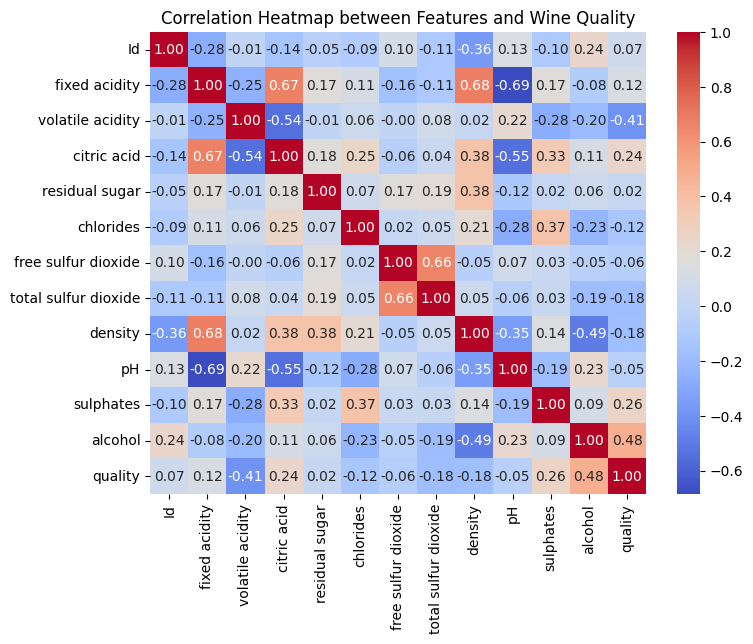

In [185]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap between Features and Wine Quality")
plt.show()


### 2. pH vs. Sulphates for High-Quality Wines
pH and sulphates might be crucial in determining wine quality. This insight can help in identifying the ideal pH and sulphate range for higher quality wines.

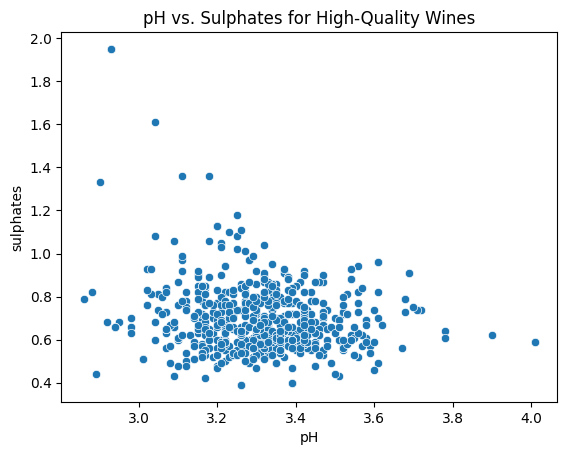

In [186]:
high_quality_wine = df[df['quality'] >= 6]
sns.scatterplot(x='pH', y='sulphates', data=high_quality_wine)
plt.title('pH vs. Sulphates for High-Quality Wines')
plt.show()


### 3. Alcohol Content vs. Quality
Alcohol content might have a significant impact on wine quality. Analyzing its distribution across different quality levels could help in identifying the alcohol range optimal for higher-quality wines.


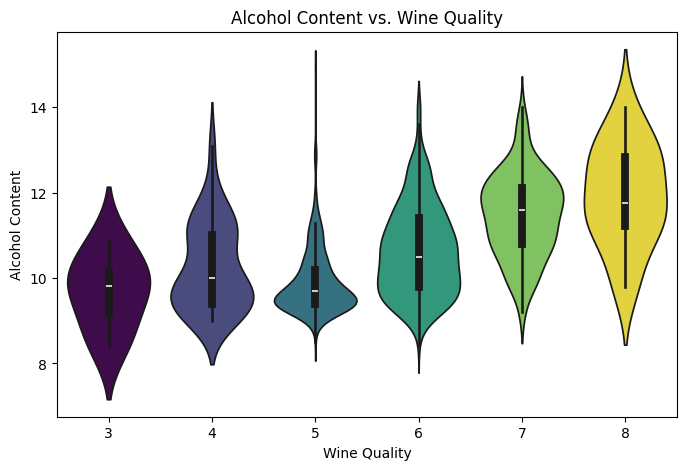

In [187]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='quality', y='alcohol', data=df, hue='quality', palette='viridis', legend=False)
plt.title('Alcohol Content vs. Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.show()


In [188]:
# Drop the column 'Id' from the DataFrame along the columns axis (axis=1)
df = df.drop('Id', axis=1)
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [189]:
# Create a new DataFrame 'x' containing features by dropping the 'quality' column along the columns axis (axis=1)
x = df.drop('quality', axis=1)
x
# Create a Series 'y' containing the target variable 'quality' from the DataFrame 'df'
y = df['quality']
y



0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [190]:
# Split the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=95)


Standardization

In [191]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [192]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [193]:
## Best model selection
dt = grid_search.best_estimator_
dt.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=0)

In [194]:
# Use the trained RandomForestClassifier model to predict the target variable for the test data
y_pred = dt.predict(x_test)


In [195]:
# Compute the confusion matrix based on the actual and predicted values
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[  0   0   1   0   0   0]
 [  0   0   7   4   1   0]
 [  0   0 109  27   3   0]
 [  0   1  34 102   8   0]
 [  0   0   1  18  23   0]
 [  0   0   0   2   2   0]]


Plot for confusion matrix

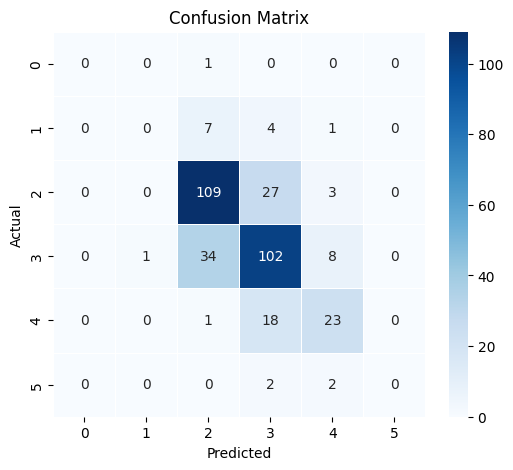

In [196]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [197]:

# Calculate the accuracy score of the predictions made by the model
score = accuracy_score(y_test,y_pred)
# Print the accuracy score
print("Accuracy Score:", score)

Accuracy Score: 0.6822157434402333


In [198]:

# Calculate probability distribution of 'quality'
quality_counts = df['quality'].value_counts()
total_samples = quality_counts.sum()
quality_probabilities = quality_counts / total_samples

# Calculate Gini index
gini_index = 1 - sum([(p ** 2) for p in quality_probabilities])
print("Gini index :", gini_index)



Gini index : 0.6413461221984171


In [199]:
# Generate a classification report based on the actual and predicted values
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        12
           5       0.72      0.78      0.75       139
           6       0.67      0.70      0.68       145
           7       0.62      0.55      0.58        42
           8       0.00      0.00      0.00         4

    accuracy                           0.68       343
   macro avg       0.33      0.34      0.34       343
weighted avg       0.65      0.68      0.66       343



c:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

ROC Curve and AUC Score

In [200]:
# Convert 'quality' into a binary format for multi-class classification
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
y_pred_prob = dt.predict_proba(x_test) 

# Compute the AUC score (One vs Rest)
auc_score = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')

print(f"AUC Score: {auc_score:.4f}")



AUC Score: 0.7252


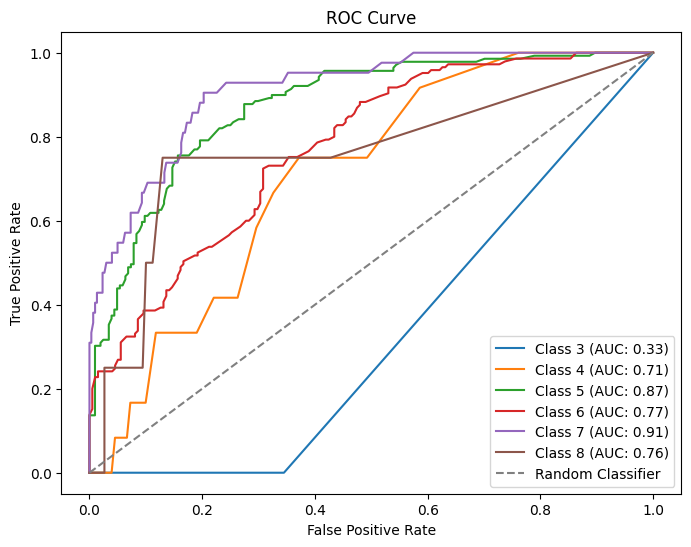

In [201]:
# Plot ROC Curves for each class
plt.figure(figsize=(8, 6))

for i, class_label in enumerate(np.unique(y_test)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC: {roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i]):.2f})')

# Plot random classifier line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()